# Taylor Series Approximations

**[The Taylor Series](https://en.wikipedia.org/wiki/Taylor_series)** is useful for expressing approximations of functions when we don't know the exact function, for approximating the solutions to difficult differential equations, or when functions are too expensive (or impossible) to compute exactly. A knowledge of differential calculus is helpful, but not necessary for this notebook. The next section will briefly cover the necessary prerequisites. But first, we introduce ```sympy```, a python package that does symbolic computation, a.k.a a computer algebra system. Below we plot the two functions $y = x$ and $y = x^2$.

- sp.symbols returns a symbol that can be treated as algebraic symbols.
- the parameters ```xlim``` and ```ylim``` denote the desired range of the x and y axis.
- ```show = False``` prevents the final figure from immediately showing, allowing us to add multiple graphs to the same plot in the following line.
- the ```append``` method allows us to add graphs to an existing plot

In [18]:
!pip3 install sympy

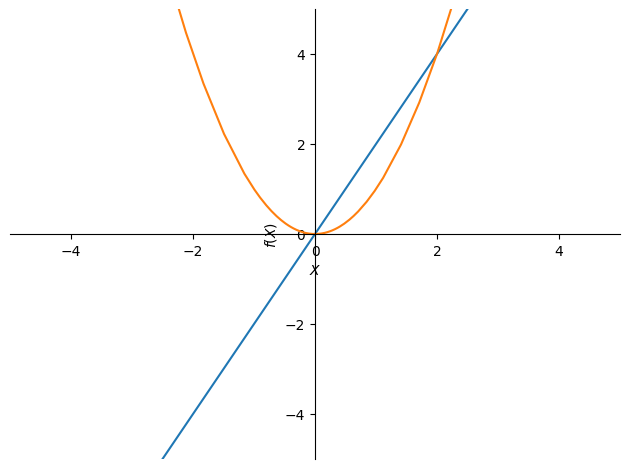

In [2]:
import sympy as sp

x = sp.symbols("X")

p1 = sp.plot(2*x, xlim = [-5,5], ylim = [-5, 5], show = False)
p2 = sp.plot(x ** 2, xlim = [-5,5], ylim = [-5, 5], show = False)
p1.append(p2[0])
p1.show()

## The Slope of a Nonlinear Function

What is the slope of a function? As you may recall, it is the *rate of change* of a function. That is to say, for every increase in $x$, what is the proportional increase in $y$? The point-intercept formula of a linear function of one variable is described as follows:

$$ 
    y = mx + b
$$

Where $m$ is the slope. Given the above definition, the **slope-intercept formula** may make the logic clearer.

$$
    (y - y_0) = m(x - x_0)
$$

$$
    m = \frac{(y - y_0)}{(x - x_0)}
$$

As seen above, $m$ is the ratio of the change in y by the change in x. For $y = x$, the slope is 1. For $y = 2x$, the slope is 2, and so on. But consider the function $y = x^2$. What would be its slope?

Let us rephrase the above equation. Let us define $f(x) = x^2$, and $h$ as an infinitesimal (a number smaller than any real number, but not zero). If we define as the slope of the tangent line at some x, we can say the following:

$$
    f'(x) =   \frac{f(x + h) - f(x)}{h}
$$

This formula describes how to find the *derivative* of a function 'from first principles'. There are many ways to describe this derivative, but for our purposes, we can define it as the *slope of the line tangent to the graph* at some $x$.

We can demonstrate this as such: Suppose $f(x) = 5x$. Then, we can say:

$$
    f'(x) = \lim_{h\to0}( \frac{5(x + h) - 5x}{h} ) = \lim_{h\to0} \frac{5x + 5h - 5x}{h} = \lim_{h\to0} \frac{5h}{h} = \lim_{h\to0} (5) = 5
$$

As expected, this formula gave us the slope 5 for $f(x) = 5x$, such that $f'(x) = 5$. And this makes sense: for any value x you pass into f(x), the slope will be a constant 5 as the slope never changes.

But why bother with all this? The utility lies in finding the slope of a non-linear function, such as $f(x) = x^2$:

$$
f'(x) = \lim_{h\to0}(\frac{(x+h)^2  - x^2}{h}) = \lim_{h\to0}(\frac{x^2 + 2xh + h^2  - x^2}{h}) = \lim_{h\to0}(\frac{2xh + h^2}{h}) = \lim_{h\to0}(\frac{h(2x + h)}{h}) = \lim_{h\to0}(2x + h) = 2x
$$

What an interesting result! We see that the slope is not a constant, but another function. What does this mean? It means that **for every point x, f'(x) will give you the slope of the line tangeant to the cure, also known as the instantaneous rate of change**. $f'(x)$ is referred to as the *first derivative* of $f(x)$

## Approximating a Function

Suppose I had the following function $f(x) = e^x$, And I wanted a function $p(x)$ that behaved very similarly to f(x) at some point $a$. How might we construct  such a function?

Let's start with a simple function. We know that f(0) = 1, as any number to the power of zero is equal to 1. And so we can begin to define our function with the mapping p(0) = 1

We can view the two graphs below:

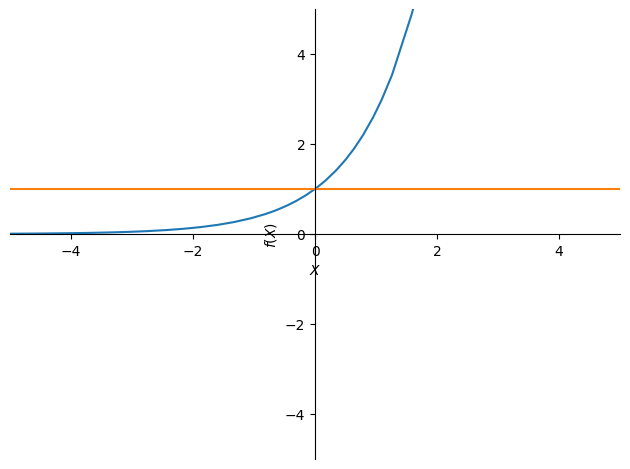

In [3]:
f = sp.plot(sp.exp(x), xlim = [-5,5], ylim = [-5, 5], show = False)
p = sp.plot(1, xlim = [-5,5], ylim = [-5, 5], show = False)
f.append(p[0])
f.show()

As expected, the approximation is great at precisely x=0! However, we find that as the distance from x=0 grows, the approximation becomes much worse, especially in the positive direction. Perhaps if we adjusted the slope of our prediction, we could make it closer?

$ p(0) = 1 + f'(0)x$

$e^x$ has a very nice property for the purposes of this demonstration: its slope is equivalent to its value for all x. And so, we can conclude that f'(0) is also equal to 1. It is possible to construct such a polynomial for any function, however that will need rules of differentiation that are beyond the scope of this notebook.

$ p(0) = 1 + (1)x$

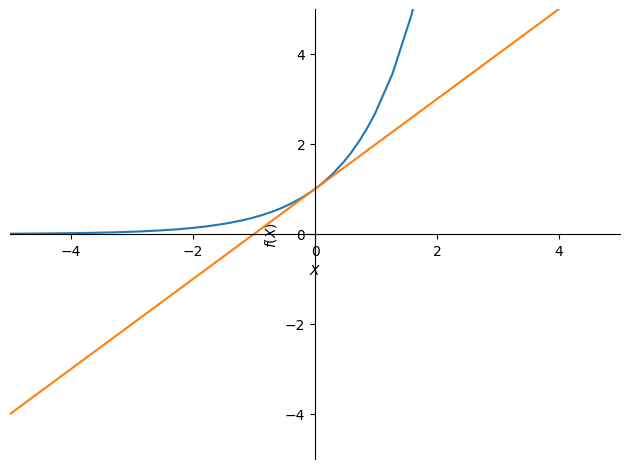

In [4]:
f = sp.plot(sp.exp(x), xlim = [-5,5], ylim = [-5, 5], show = False)
p = sp.plot(1 + 1 * x, xlim = [-5,5], ylim = [-5, 5], show = False)
f.append(p[0])
f.show()

It's better, but not perfect. Can we make it better?

$p(0) = 1 + (1)(x) + f''(0)(x^2)$ 

$p(0) = 1 + (1)(x) + \frac{1}{2}(x^2)$ 

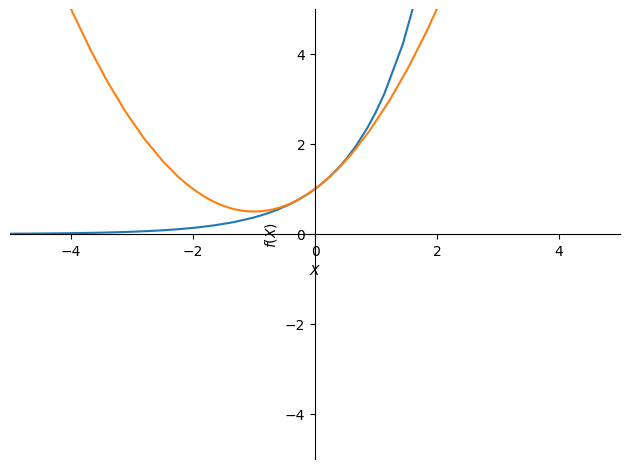

In [5]:
f = sp.plot(sp.exp(x), xlim = [-5,5], ylim = [-5, 5], show = False)
p = sp.plot(1 +  x + 1/2*x ** 2, xlim = [-5,5], ylim = [-5, 5], show = False)
f.append(p[0])
f.show()

Lets add more terms and see what happens.

$p(0) = 1 + (1)(x) + \frac{1}{2}(x^2) + f'''(x)(x^2)$ 

$p(0) = 1 + (1)(x) + \frac{1}{2}(x^2) + \frac{1}{6}(x^3)$ 

<div class="alert alert-block alert-info">
<b>Note: You may notice that rather than the expected power rule, we take 1/n! f^n(x). This will be explained later.</b> 
</div>

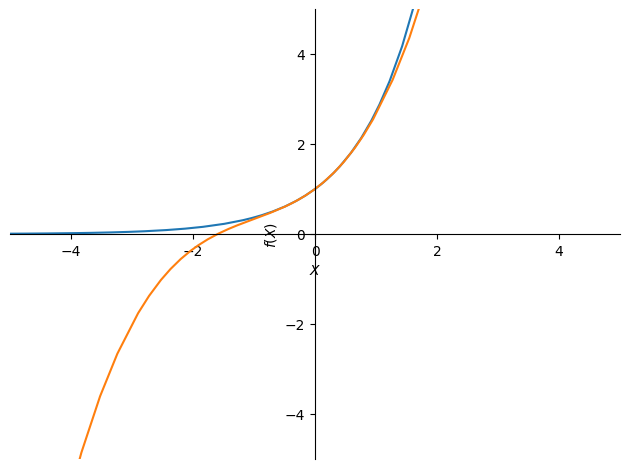

In [6]:
f = sp.plot(sp.exp(x), xlim = [-5,5], ylim = [-5, 5], show = False)
p = sp.plot(1 +  x + 0.5*x ** 2 + (1/6)*x ** 3, xlim = [-5,5], ylim = [-5, 5], show = False)
f.append(p[0])
f.show()

Notice how, as we add more terms, the distance from our chosen point where our function behaves closely to the original function widens? Let's add more terms and see if that holds.

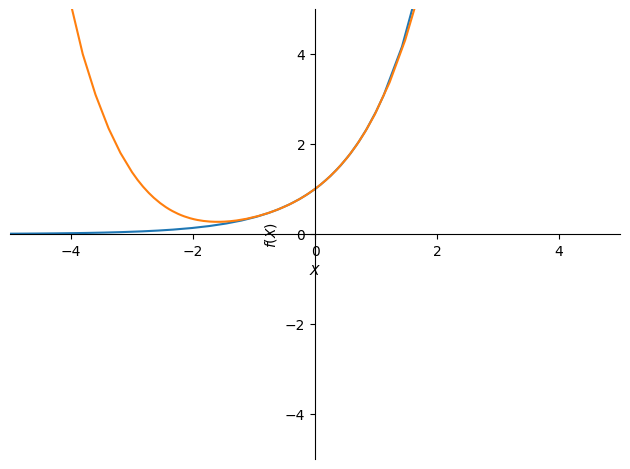

In [7]:
f = sp.plot(sp.exp(x), xlim = [-5,5], ylim = [-5, 5], show = False)
p = sp.plot(1 + x + (1/2)*x ** 2 + (1/6)*x ** 3 + (1/24)*x ** 4, xlim = [-5,5], ylim = [-5, 5], show = False)
f.append(p[0])
f.show()

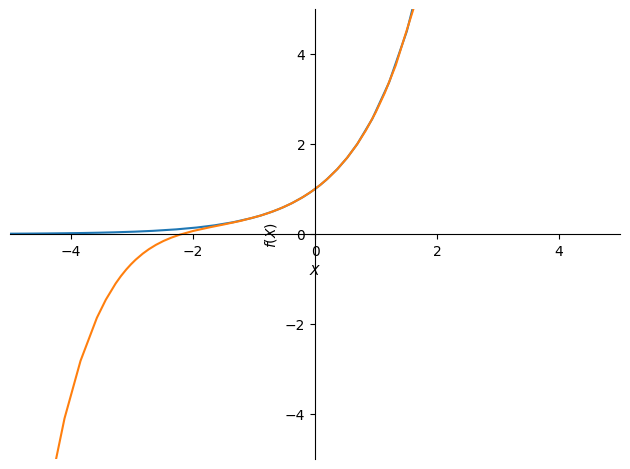

In [8]:
f = sp.plot(sp.exp(x), xlim = [-5,5], ylim = [-5, 5], show = False)
p = sp.plot(1 + x + (1/2)*x ** 2 + (1/6)*x ** 3 + (1/24)*x ** 4 + (1/120)*x ** 5, xlim = [-5,5], ylim = [-5, 5], show = False)
f.append(p[0])
f.show()

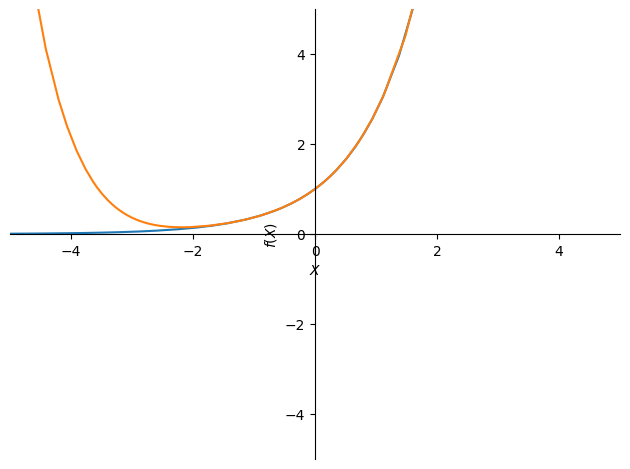

In [9]:
f = sp.plot(sp.exp(x), xlim = [-5,5], ylim = [-5, 5], show = False)
p = sp.plot(1 + x + (1/2)*x ** 2 + (1/6)*x ** 3 + (1/24)*x ** 4 + (1/120)*x ** 5 + (1/720)*x**6, xlim = [-5,5], ylim = [-5, 5], show = False)
f.append(p[0])
f.show()

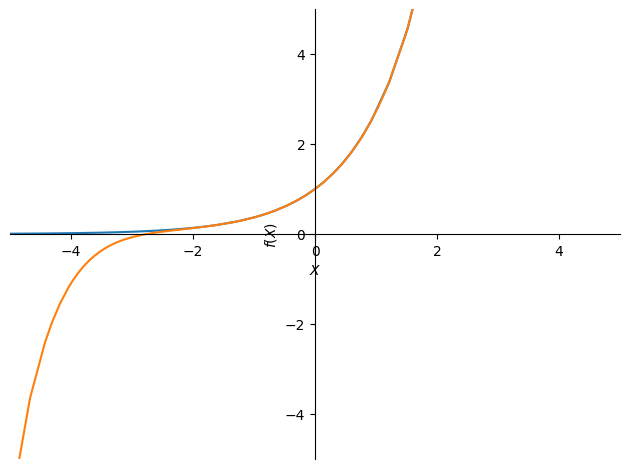

In [10]:
f = sp.plot(sp.exp(x), xlim = [-5,5], ylim = [-5, 5], show = False)
p = sp.plot(1 + x + (1/2)*x ** 2 + (1/6)*x ** 3 + (1/24)*x ** 4 + (1/120)*x ** 5 + (1/720)*x**6 + (1/5040)*x ** 7, xlim = [-5,5], ylim = [-5, 5], show = False)
f.append(p[0])
f.show()

You may have noticed that beyond a certain number of terms, adding more polynomials no longer helps in the approximation. This is called the **radius of convergence**. Notice that our method describes a power series - and like all series, it either converges or diverges. Beyond a certain number of terms, the series no longer converges to the original function.

What we have described so far is a **Maclaurin Series**, a special case of the **Taylor Series**, where we specifically find the approximation of $f(x) = 0$. The more generalized form is to take the point of $f(x - a) = 0, centering the radius of convergence around $a$ instead of 0.

## The Taylor Series

Returning to our approximation function $p(x)$. We can approximate it's value around a point $a$ using a polynomial $p(x) = c_0 + c_1(x - a) + c_2(x-a)^2 + c_3(x-a)^3...$, as seen above. But how do we find $c_n$?

It's not as tricky as it may look at first glance. If we were to pass some number $a$ into $p(a)$, all of the binomials in the series evaluate to zero.
$$
    p(a)= c_0 + c_1(a - a) + c_2(a - a)^2 + c_3(a - a)^3...
$$
$$
    p(a)= c_0 + c_1(0) + c_2(0)^2 + c_3(0)^3...
$$

So we know that $p(a) = c_0$.

If we take the first derivative of $p(x)$, $p'(x)$, we get $c_1 + 2c_2(x-a) + 3c_3(x-a)^2...$. We can do the same thing we did above - passing $a$ into $p'(x) - to find $c_1$

$$
   p'(a) = c_1 + 2c_2(a-a) + 3c_3(a-a)^2...
$$
$$
   p'(a) = c_1 + 2c_2(0) + 3c_3(0)^2...
$$

So we know that $p'(a) = c_1$.

Here's where it gets a bit tricky if you're not careful. Observe as we take the second derivative of $p(x)$:

$$
    p''(a) = 2c_2 + (2)(3)c_3(a-a)...
$$
$$
    p''(a) = 2c_2 + (2)(3)c_3(0)...
$$

Notice that $c_2 = \frac{p''(a)}{2}$. By applying the power rule, we have multiplied a factor of 2 to the original $c_2$. Thus, to get $c_2$, we divide $p''(a)$ by 2. It gets even more interesting as we take more derivatives.



$$
    p^{(3)}(a) = (2)(3)c_3 + (2)(3)(4)c_4(a-a)...
$$
$$
    p^{(3)}(a) = (2)(3)c_3 + (2)(3)(4)c_4(0)...
$$
$$
    c_3 = \frac{p^{(3)}(a)}{(2)(3)} 
$$

<hr style="width: 34%; margin-left: auto; margin-right: auto">

$$
    p^{(4)}(a) = (2)(3)(4)c_4 + (2)(3)(4)(5)c_5(a-a)...
$$
$$
    p^{(4)}(a) = (2)(3)(4)c_4 + (2)(3)(4)(5)c_5(0)...
$$
$$ 
    c_4 = \frac{p^{(4)}(a)}{(2)(3)(4)}
$$


> Author: Abdullah Binladin

> Date: 28/11/2023